<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 1

This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [158]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [159]:
Abha=pd.read_csv('/Users/abhaindurkar/Desktop/ECON628-01-abhaindurkar/datasets/sleep/sleep_bh.csv')



In [160]:
Abha.head(3)

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936


In [161]:
Abha.tail()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916
705,30,0,706,0.182331,0.030075,16,6750,1,0,4747,...,0,2363,0,2363,0,8,1,9,NaN,900


In [162]:
Abha.isnull()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [163]:
print Abha.shape[0]

706


In [164]:
list_miss_val = [row for index, row in Abha.iterrows() if row.isnull().sum() >0 ]
list_miss_val

[age           34.000000
 black          0.000000
 case         533.000000
 clerical       0.182331
 construc       0.030075
 educ          17.000000
 earns74        0.000000
 gdhlth         1.000000
 inlf           0.000000
 leis1       3922.000000
 leis2       3612.000000
 leis3       3612.000000
 smsa           0.000000
 lhrwage             NaN
 lothinc        0.000000
 male           1.000000
 marr           1.000000
 prot           1.000000
 rlxall      4025.000000
 selfe          1.000000
 sleep       3715.000000
 slpnaps     4025.000000
 south          0.000000
 spsepay        0.000000
 spwrk75        0.000000
 totwrk      2443.000000
 union          0.000000
 worknrm     2403.000000
 workscnd      40.000000
 exper         11.000000
 yngkid         0.000000
 yrsmarr       14.000000
 hrwage              NaN
 agesq       1156.000000
 Name: 532, dtype: float64, age           44.000000
 black          1.000000
 case         534.000000
 clerical       0.182331
 construc       0.03007

In [165]:
Abha=Abha.dropna(axis=1, how='all')

In [166]:
list_miss_val = [row for index, row in Abha.iterrows() if row.isnull().sum() >0 ]
list_miss_val

[age           34.000000
 black          0.000000
 case         533.000000
 clerical       0.182331
 construc       0.030075
 educ          17.000000
 earns74        0.000000
 gdhlth         1.000000
 inlf           0.000000
 leis1       3922.000000
 leis2       3612.000000
 leis3       3612.000000
 smsa           0.000000
 lhrwage             NaN
 lothinc        0.000000
 male           1.000000
 marr           1.000000
 prot           1.000000
 rlxall      4025.000000
 selfe          1.000000
 sleep       3715.000000
 slpnaps     4025.000000
 south          0.000000
 spsepay        0.000000
 spwrk75        0.000000
 totwrk      2443.000000
 union          0.000000
 worknrm     2403.000000
 workscnd      40.000000
 exper         11.000000
 yngkid         0.000000
 yrsmarr       14.000000
 hrwage              NaN
 agesq       1156.000000
 Name: 532, dtype: float64, age           44.000000
 black          1.000000
 case         534.000000
 clerical       0.182331
 construc       0.03007

In [167]:
Abha=Abha.dropna(subset = ['hrwage','lhrwage'])

In [168]:
print Abha.isnull().sum()

age         0
black       0
case        0
clerical    0
construc    0
educ        0
earns74     0
gdhlth      0
inlf        0
leis1       0
leis2       0
leis3       0
smsa        0
lhrwage     0
lothinc     0
male        0
marr        0
prot        0
rlxall      0
selfe       0
sleep       0
slpnaps     0
south       0
spsepay     0
spwrk75     0
totwrk      0
union       0
worknrm     0
workscnd    0
exper       0
yngkid      0
yrsmarr     0
hrwage      0
agesq       0
dtype: int64


## 3. Check for correlations
    Implement a heatmap
---

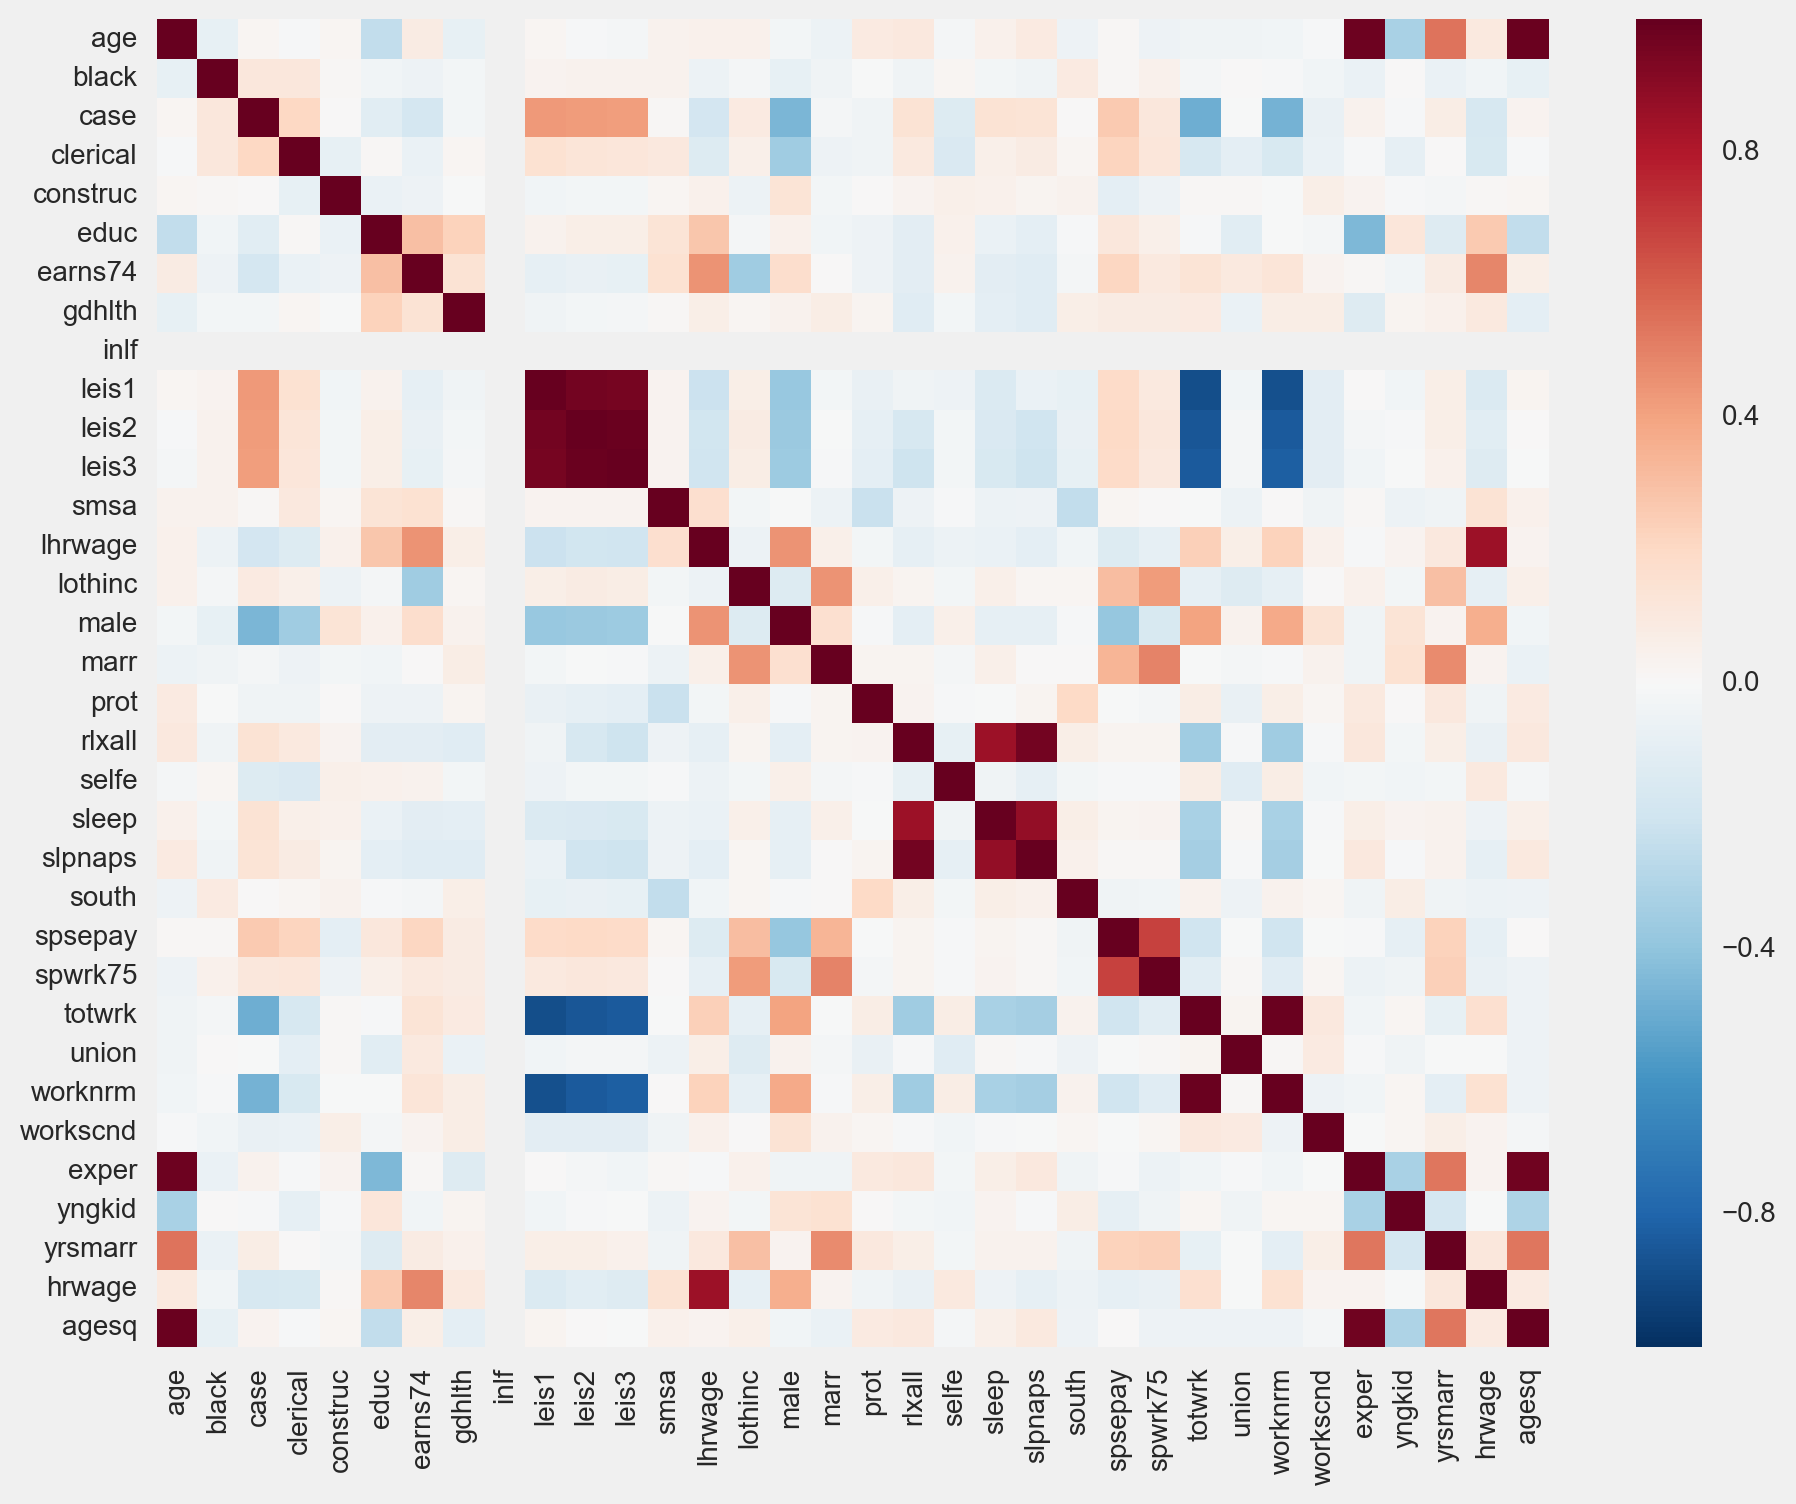

In [169]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(Abha.corr(), ax=ax)
plt.show()

In [170]:
Abha.head(3)

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936


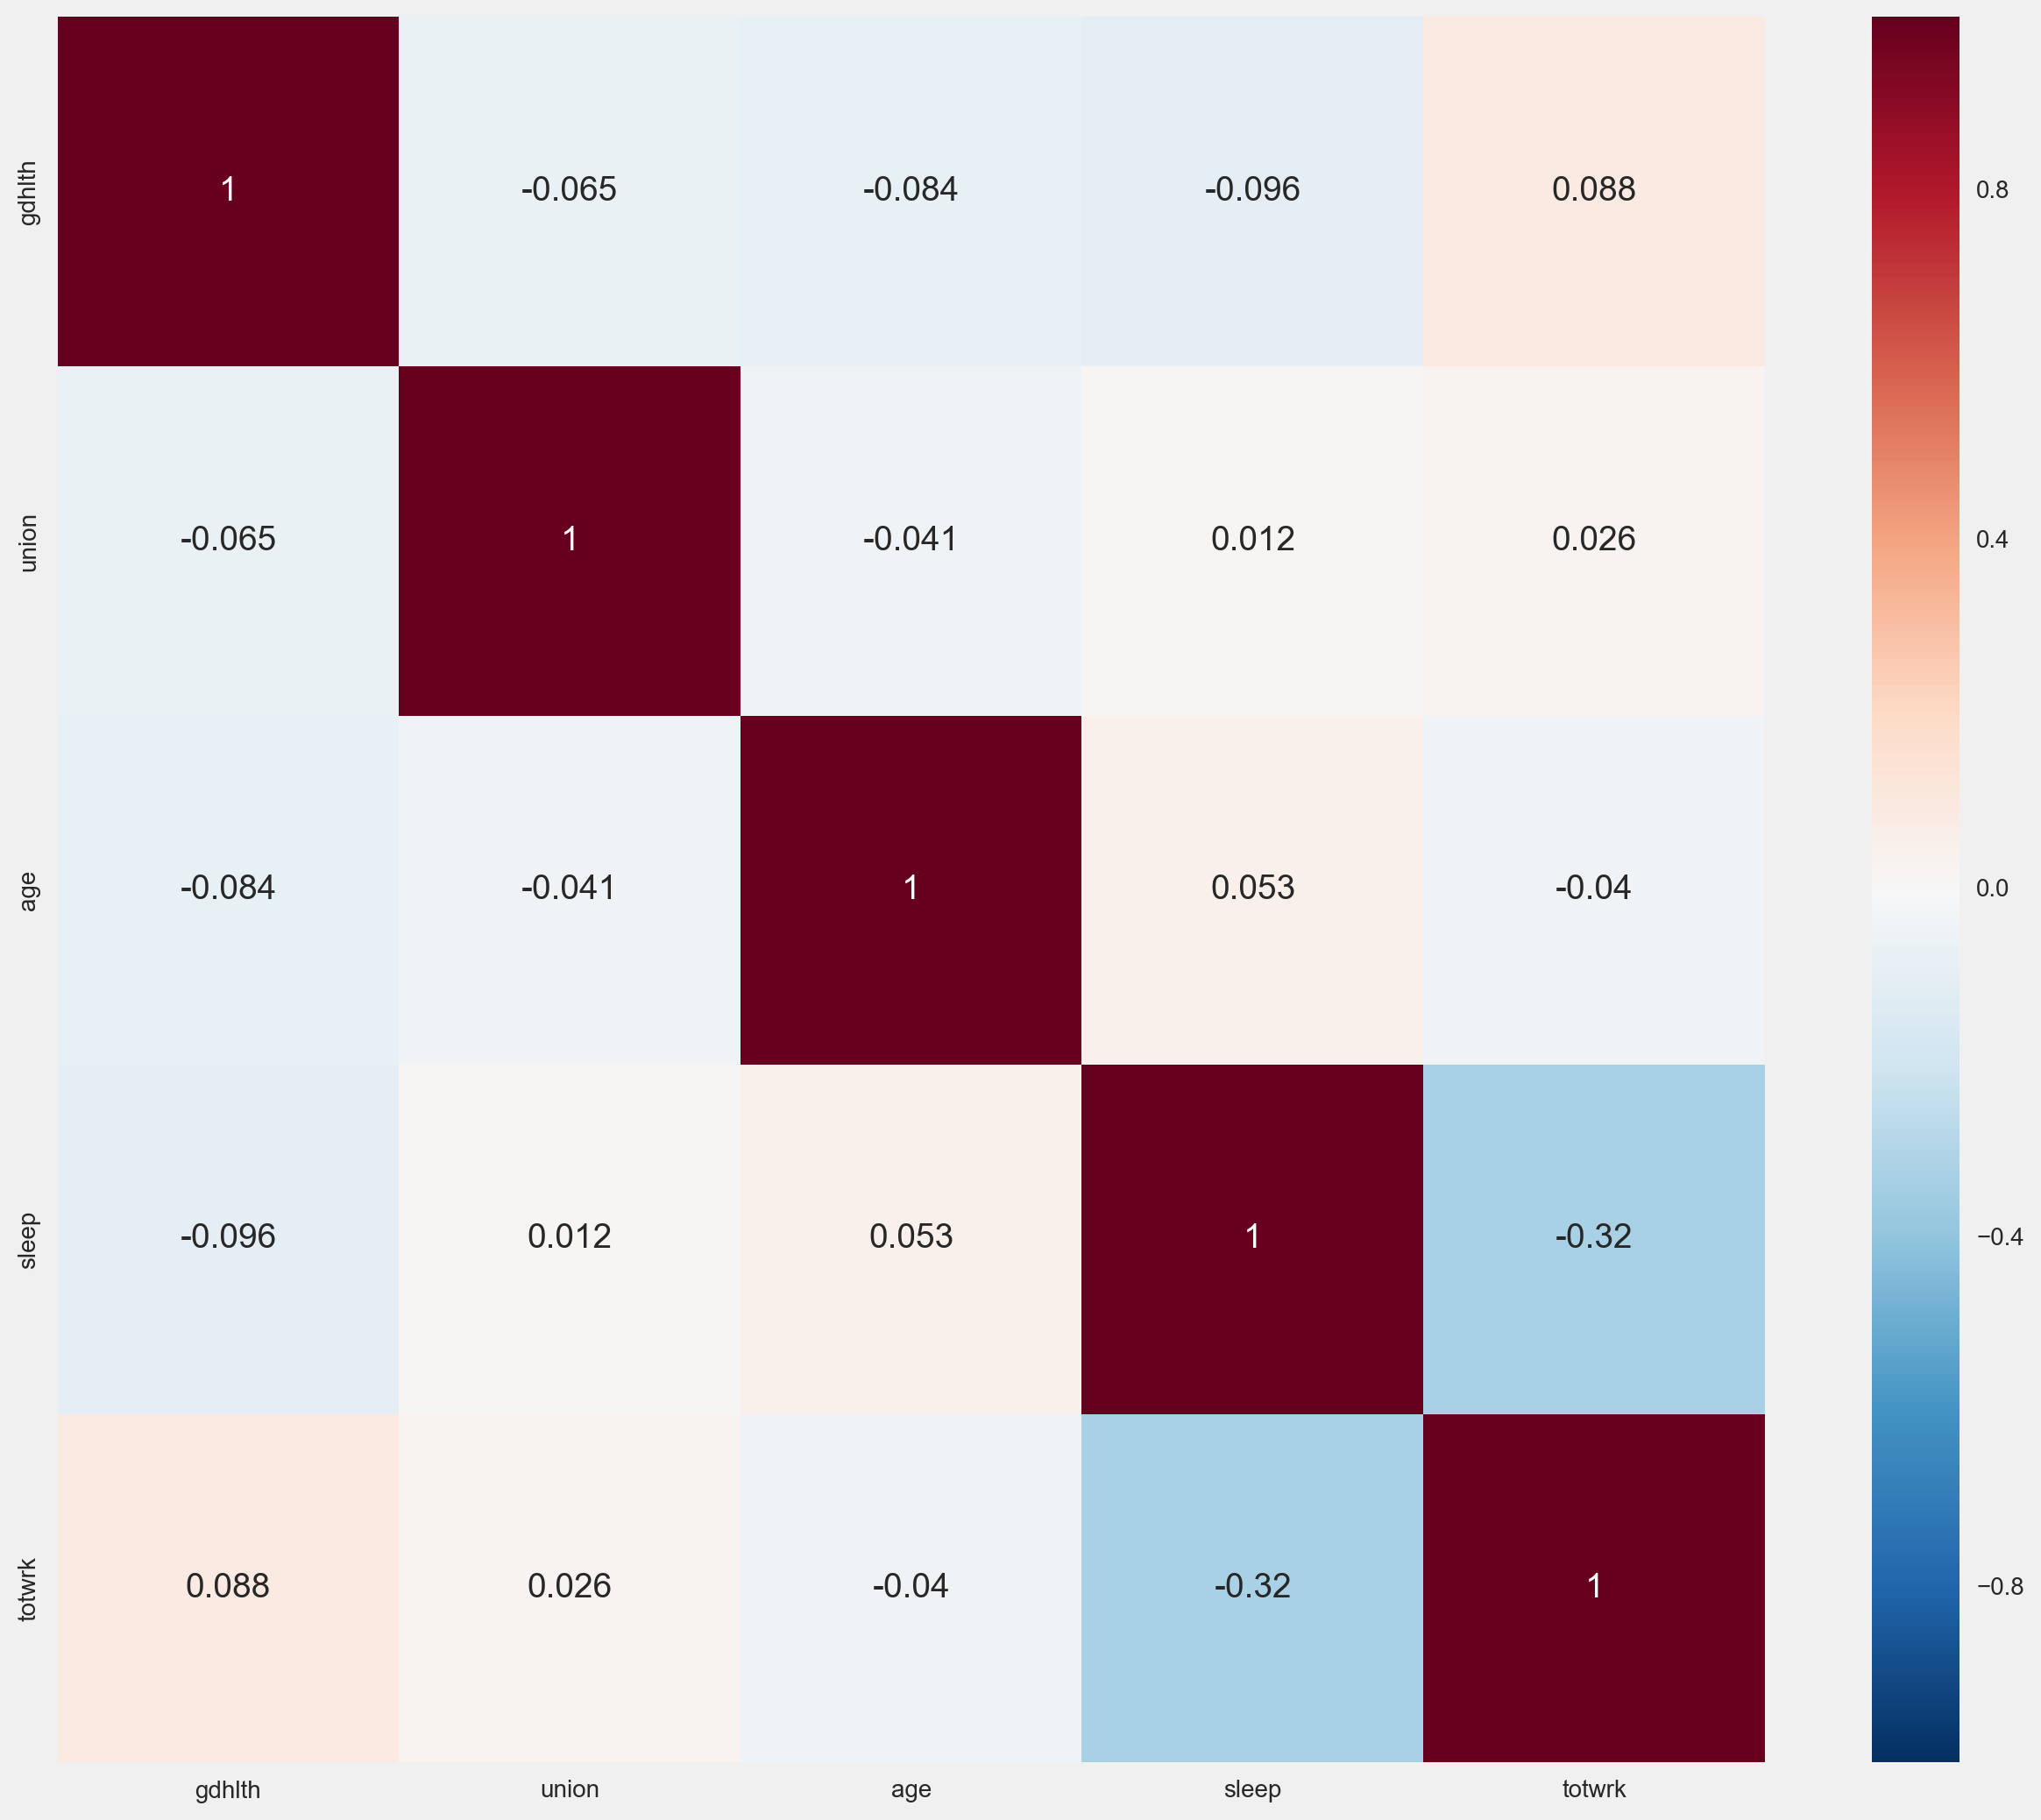

In [171]:
fig = plt.figure(figsize=(14,12))
ax = fig.gca()
sns.heatmap(Abha[['gdhlth', 'union', 'age', 'sleep', 'totwrk']].corr(),annot=True, ax=ax)
plt.show()

As expected union and goodhealth are correlated, union work has less physical pressure, there is a positive correlation between good health and total amount of work which also makes sense as a healthy worker can put in more amount of work. It is interesting to note that sleep is negatively correlated with amount of work. There is one more interesting correlation between sleep and age which is positive as age increases the amount of sleep also increases. All these correlations make sense.

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [172]:
Abha.head(2)

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961


In [173]:
X = Abha[['gdhlth','totwrk','worknrm','workscnd', 'exper','agesq','educ','black','yrsmarr','yngkid','age','yrsmarr']]
y = Abha.sleep

In [174]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(372, 12) (160, 12)


(372L,) (160L,)


## 4.2.1 OLS
    
---

In [175]:
from sklearn.linear_model import LinearRegression

## define a linear regression model
lr = LinearRegression()

## fit your model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [176]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#         mean_squared_error(ytrain, ytrain_pred),
#         mean_squared_error(ytest, ytest_pred)))
# print('R^2 0LS train: %.3f, test: %.3f' % (
#         r2_score(ytrain, ytrain_pred),
#         r2_score(ytest, ytest_pred)))

In [177]:
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [178]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lr)

MSE OLS train data: 161868.41, test data: 170829.30
R^2 OLS train data: 0.14, test data: 0.04


## 4.2.2 Regularization
    
---

In [179]:

from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [180]:
## Find the optimal alpha
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

100000.0


In [181]:
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(X_train, y_train)

Ridge(alpha=100000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [182]:
## Evaluate the Ridge Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)

MSE Ridge train data: 164010.34, test data: 171659.46
R^2 Ridge train data: 0.13, test data: 0.04


In [183]:
## Find the optimal alpha
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

2881.65827105


....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished


In [184]:
## Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit your regression
lasso.fit(X_train, y_train)

Lasso(alpha=2881.6582710461021, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [185]:
## Evaluate the Lasso Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

MSE Lasso train data: 164081.35, test data: 170742.08
R^2 Lasso train data: 0.13, test data: 0.04


In [186]:
## Find the optimal alphas
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

150905.831523
0.01


............................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   19.4s finished


In [187]:
##  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## Fit your model
enet.fit(X_train, y_train)

ElasticNet(alpha=150905.83152277942, copy_X=True, fit_intercept=True,
      l1_ratio=0.01, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [188]:
## Evaluate the Elastic Net Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)

MSE Elastic Net train data: 164496.55, test data: 168136.35
R^2 Elastic Net train data: 0.13, test data: 0.06


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

In [189]:
def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)

    return method_coefs.head(10)

In [190]:
best_reg_method(X, lasso)

,abs_coef,coef,variable
1,0.171275,-0.171275,totwrk
5,0.023875,0.023875,agesq
0,0.000000,-0.000000,gdhlth
2,0.000000,-0.000000,worknrm
3,0.000000,-0.000000,workscnd
4,0.000000,0.000000,exper
6,0.000000,-0.000000,educ
7,0.000000,-0.000000,black
8,0.000000,0.000000,yrsmarr
9,0.000000,0.000000,yngkid


Here we can see that amount the selected data frame the coefficients that best explains sleep varibales are minutes of work which has a negative coefficient indicating  and also total work, which also has a negative coeeficient. However age sqared has a positive coeffcient which makes perfectt sense as the age increases on increasing rate the sleep amount of sleep also increases.

## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [191]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()


params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [192]:
## Fit the regresion tree
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [193]:
## Print Best Estimator, parameters and score
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features='auto',
           max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=5,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': 'auto', 'min_samples_split': 5, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 5}


best score -0.0114045916202


In [194]:
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

In [195]:
feature_importance(X, dtr_best)

,feature,importance
1,totwrk,0.480958
2,worknrm,0.317210
4,exper,0.141346
11,yrsmarr,0.060487
0,gdhlth,0.000000
3,workscnd,0.000000
5,agesq,0.000000
6,educ,0.000000
7,black,0.000000
8,yrsmarr,0.000000


In [196]:
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 2504.83333333,  3386.72413793,  3386.72413793,  3205.90151515,
        3230.08928571,  3230.08928571,  3054.07407407,  3456.85416667,
        3205.90151515,  3054.07407407,  3205.90151515,  3386.72413793,
        3205.90151515,  3054.07407407,  3205.90151515,  3386.72413793,
        3054.07407407,  3205.90151515,  3054.07407407,  3205.90151515,
        3205.90151515,  3054.07407407,  3205.90151515,  3205.90151515,
        3386.72413793,  3386.72413793,  3205.90151515,  3386.72413793,
        3386.72413793,  3230.08928571,  3456.85416667,  3054.07407407,
        3230.08928571,  3205.90151515,  3456.85416667,  3205.90151515,
        3456.85416667,  3386.72413793,  3230.08928571,  3205.90151515,
        3230.08928571,  3230.08928571,  3205.90151515,  3054.07407407,
        3456.85416667,  3386.72413793,  3205.90151515,  3386.72413793,
        3205.90151515,  3205.90151515,  3205.90151515,  3456.85416667,
        3205.90151515,  3836.23076923,  3205.90151515,  3205.90151515,
      

In [197]:
## Evaluate the Regression Tree performance on my train and test data
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 148819.25, test data: 181016.08
R^2 Regression tree train data: 0.21, test data: -0.01


In [198]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

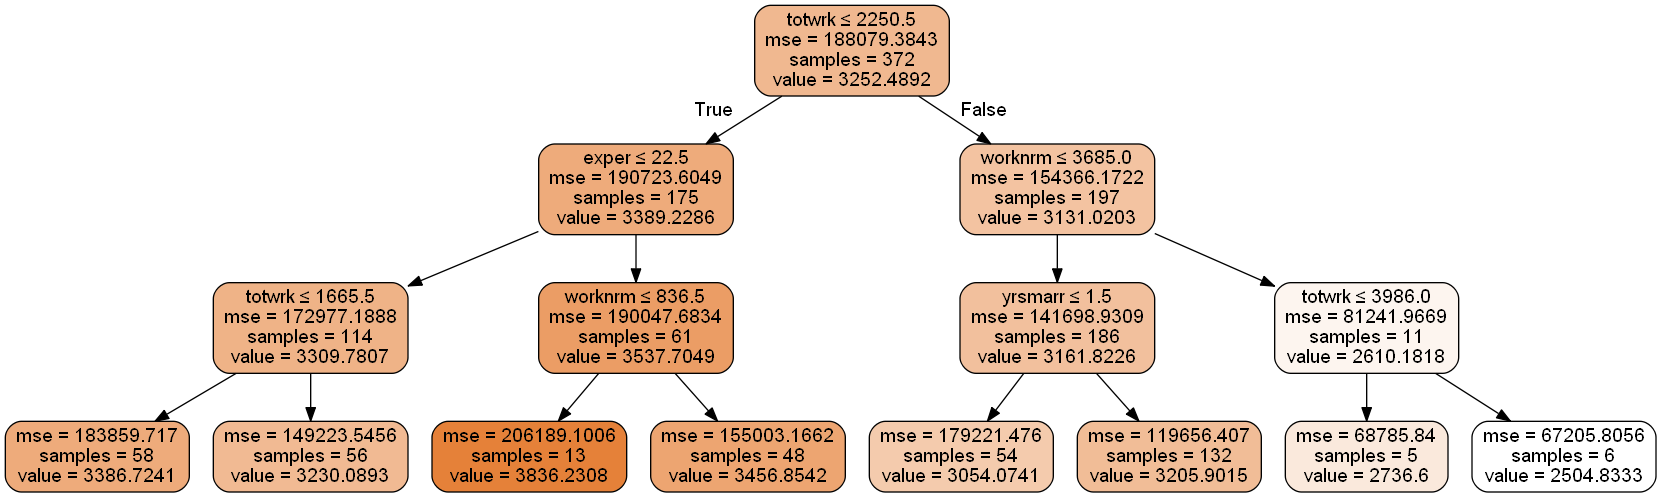

In [199]:
dot_data = StringIO()
''' dtr_best was previously defined'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [200]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [201]:
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   24.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [202]:
## Print the best estimator, parameters and score
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=5, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'min_samples_split': 3, 'max_leaf_nodes': 5, 'n_estimators': 100, 'max_depth': 3}


best score 0.0740037428661


In [203]:
## Print the feauure importance
feature_importance(X, rfr_best)

,feature,importance
1,totwrk,0.432220
2,worknrm,0.326754
4,exper,0.068124
6,educ,0.043379
8,yrsmarr,0.041112
7,black,0.024919
11,yrsmarr,0.023890
3,workscnd,0.010386
10,age,0.009249
9,yngkid,0.008947


Interestingly the coefficients on the variables that determine the sleep are positive in the random forest tree regression

In [204]:
## Predict
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 2688.46870885,  3452.67700468,  3319.09956595,  3172.73506228,
        3267.3536158 ,  3265.6829432 ,  3141.49199817,  3416.32523528,
        3171.66308606,  3189.45845624,  3171.13193404,  3352.9164594 ,
        3155.47490594,  3136.46581532,  3225.22687951,  3568.12099022,
        3141.41423603,  3198.98437679,  3184.51492746,  3174.06233377,
        3228.9485242 ,  3181.90787303,  3146.58465859,  3162.76883859,
        3428.33308747,  3562.16946198,  3165.55089308,  3305.24298716,
        3404.69225704,  3270.6057242 ,  3272.25733661,  3184.51492746,
        3263.95270702,  3171.9357571 ,  3399.22435241,  3091.26717564,
        3507.44558577,  3357.82969965,  3271.37884736,  3190.54882174,
        3267.31081981,  3267.3536158 ,  3202.99629104,  3141.49199817,
        3475.24611387,  3555.78825457,  3213.76113592,  3473.14808194,
        3168.95180187,  3162.76883859,  3236.13418091,  3290.25853966,
        3037.36512765,  3554.96150204,  3201.1161022 ,  3226.74358695,
      

In [205]:
## Evaluate your model
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 147341.12, test data: 168713.65
R^2 Random Forest Regression tree train data: 0.22, test data: 0.06


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

Here we can see that all the three models give same r^2 for train and the test data data frame, however, we can base our decision to predict the best model, also the MSE is almost same in all the three models, hence it is difficult to say that any one model is the best fit. The regression tree has the least predictive capacity based on the differences between r^2 of train and the test data. 

Since the numbers are not doing a very good job of explaining which model works, the theory or the mechanism of the models can be used to decide the validity of models in our case, Ridge works well even in presence of highly correlated features as it will include all of them in the model but the coefficients will be distributed among them depending on the correlation. I case of Lasso, it arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero. Also, the chosen variable changes randomly with change in model parameters. This generally doesn’t work that well as compared to ridge regression. Hence in this case I might conclude that Ridge will work better as their are highly correlated variables, like kids, marriage, age in cultural contexts, so there will be issue of multicolinearity.


## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS: There is the trade off between the variance and bias, when using Ridge there is issue of variance as all the variables need to be included in the model. 
But the while running Lasso, the highly correlated varibales are considered to be one which might lead to ommited variable bias, the error terms in this case will rob away the explanatory power. In my model I found it difficult to eliminate the importance of any variable on its individual effect, like having kids will reduce sleep, which though correlated with marriage but affects sleep differently. Hence I faced the tradeoff in this data set.

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS:

There is the trade off between the variance and bias, when using Ridge there is issue of variance as all the variables need to be included in the model. This holds well in some cases, but this might lead to over fitting, for example in the model I chose, age, marriage, number of kids and earnings, experience are all correlated.
But the while running Lasso, the highly correlated varibales are considered to be one which might lead to ommited variable bias, the error terms in this case will rob away the explanatory power. In my model I found it difficult to eliminate the importance of any variable on its individual effect, like having kids will reduce sleep, which though correlated with marriage but affects sleep differently. Hence I faced the tradeoff in this data set.